In [1]:
#Load modules 

import time, pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from matplotlib import cm 
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting parameters
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('../clint.mpl')

In [2]:
#Load tags dict

with open('tags_dict.pickle', 'rb') as handle:
    tags_dict = pickle.load(handle)
tags_dict 

{'exLabel': array([27, 10, 14, ..., 23, 30, 28]),
 'dcLabel': array([12., 12., 12., ..., 12., 12., 12.]),
 'energies': array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
 'dwts_norm': array([[-0.30800915, -0.46727684,  0.03249425, ...,  0.66407323,
          0.42425632, -0.91395885],
        [-0.33626375,  0.0546384 ,  0.07917199, ...,  0.32287246,
          0.1985689 ,  0.0497317 ],
        [-0.75499552, -0.54898262, -0.13890064, ...,  0.23036738,
          0.35086545,  0.73956883],
        ...,
        [ 0.24130908,  0.68569177,  0.21168356, ..., -0.34083229,
         -0.26232469, -0.39860204],
        [-0.53866524, -0.42129394, -0.32674477, ...,  0.46062148,
          0.45247069, -0.09037188],
        [ 0.18237799, -0.13595453,  0.20580509, ..., -0.38676202,
         -0.47771415, -0.89251113]])}

In [3]:
#Train SVM
#Obtain best hyperparameters from SVM_search.py 

dwts_norm = tags_dict['dwts_norm']
labels = tags_dict['dcLabel']

start_time = time.time()
svm = SVC(random_state=0, 
          kernel='rbf', 
          decision_function_shape ='ovr',
          class_weight='balanced',
          C=276065215.2769305,
          gamma=0.026240422735875145)
svm.fit(dwts_norm, labels)
print("--- %s seconds ---" % (time.time() - start_time))

# Save the trained SVM
filename = 'svm.sav'
pickle.dump(svm, open(filename, 'wb'))

--- 1.8720471858978271 seconds ---


In [4]:
#Load embedded waveforms

dwts_norm_2d = np.load('dwts_norm_2d.npy')

In [5]:
# Train 2D SVM to visualize classification

start_time = time.time()
svm_2d = SVC(random_state=0, 
          kernel='rbf', 
          decision_function_shape ='ovr',
          class_weight='balanced',
          C=4166.760230145203,
          gamma=0.12282348796845859)
svm_2d.fit(dwts_norm_2d, labels)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.021637201309204 seconds ---


([], [])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
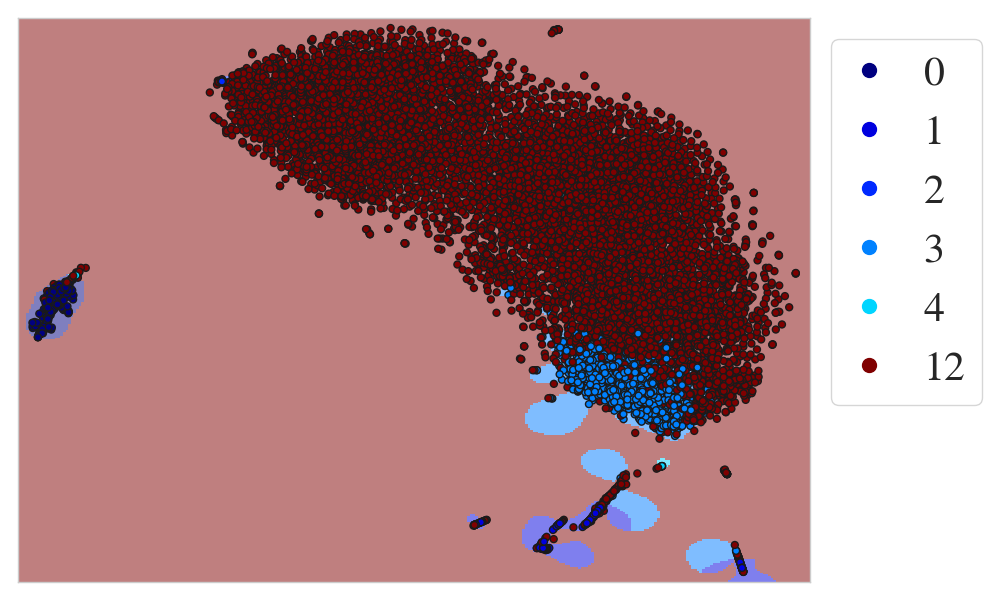

In [6]:
# Create mesh for plotting
num_points = 300
x_min, x_max = dwts_norm_2d[:, 0].min() - 1, dwts_norm_2d[:, 0].max() + 1
y_min, y_max = dwts_norm_2d[:, 1].min() - 1, dwts_norm_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),np.linspace(y_min, y_max, num_points))

# Plot decision boundaries of 2D SVM

%matplotlib widget 
fig, ax = plt.subplots(1,1, figsize=(10,6))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.grid(False)
ax.pcolormesh(xx, yy, -Z, cmap=plt.cm.jet_r, alpha=0.5)
scatter = ax.scatter(dwts_norm_2d[:, 0], dwts_norm_2d[:, 1], c=labels, cmap=plt.cm.jet, edgecolors="k", marker='.', label=labels)
ax.legend(*scatter.legend_elements(), fontsize=30, bbox_to_anchor=(1,1))
plt.xticks(())
plt.yticks(())
# plt.savefig('all')

In [7]:
# Create binary labels

idxs = np.where(labels!=0)[0]
binary_labels = np.zeros(labels.shape[0])
for i in range(labels.shape[0]):
    if labels[i] != 0:
        binary_labels[i] = 1

# Train 2D SVM with binary labels to visualize classification

start_time = time.time()
svm_2d_binary = SVC(random_state=0, 
          kernel='rbf', 
          decision_function_shape ='ovr',
          class_weight='balanced',
          C=24.751524972151373,
          gamma=3.4626598876333463)
svm_2d_binary.fit(dwts_norm_2d, binary_labels)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.5603878498077393 seconds ---


([], [])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
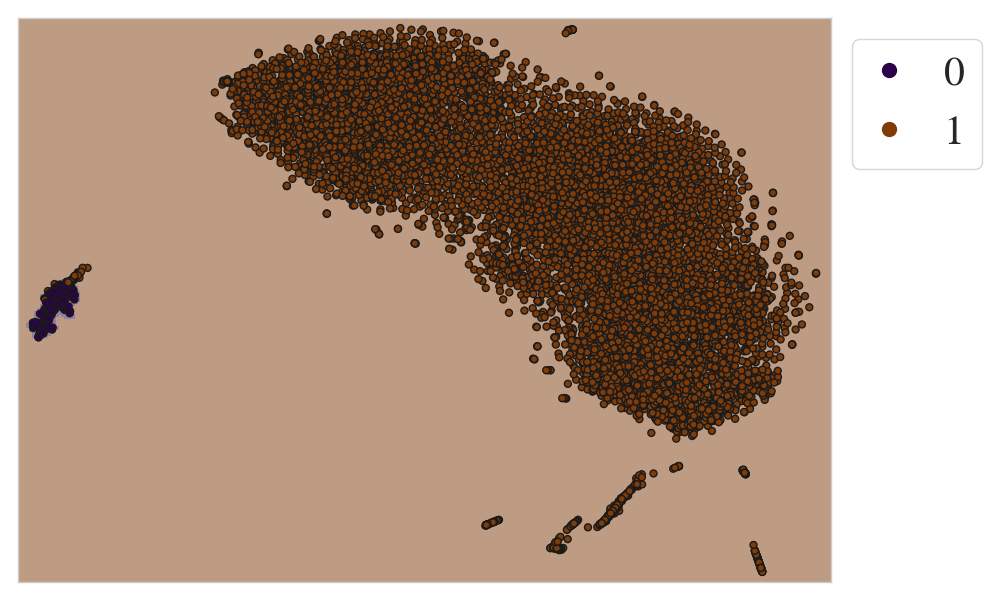

In [8]:
# Plot decision boundaries of 2D SVM with binary labels 

%matplotlib widget
fig, ax = plt.subplots(1,1, figsize=(10,6))
Z = svm_2d_binary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.grid(False)
ax.pcolormesh(xx, yy, -Z, cmap=plt.cm.PuOr, alpha=0.5)
scatter = ax.scatter(dwts_norm_2d[:, 0], dwts_norm_2d[:, 1], c=binary_labels, cmap=plt.cm.PuOr_r, edgecolors="k", marker='.', label=binary_labels)
ax.legend(*scatter.legend_elements(), fontsize=30, bbox_to_anchor=(1,1))
plt.xticks(())
plt.yticks(())
# plt.savefig('binary')